# Feature engineering Cat Columns Encoding
* For this step we decided to put a model that give us the most important features and execute categorical Columns Encoding

In [47]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Loading data

In [48]:
norm_data = pd.read_csv('../data/interim/normalized_df.csv',delimiter=',')
norm_data.head()

,CUSTOMER_ID,COLLEGE,DATA,INCOME,OVERCHARGE,LEFTOVER,HOUSE,LESSTHAN600k,CHILD,JOB_CLASS,REVENUE,HANDSET_PRICE,OVER_15MINS_CALLS_PER_MONTH,TIME_CLIENT,AVERAGE_CALL_DURATION,REPORTED_SATISFACTION,REPORTED_USAGE_LEVEL,CONSIDERING_CHANGE_OF_PLAN,CHURNED
0,C100000,zero,0.342068,-1.235851,-0.947823,-0.892885,1.521888,False,4,3,0.094061,-1.084221,-0.745323,-1.138392,2.068906,very_unsat,little,considering,STAY
1,C100001,one,-0.405661,-0.720966,0.883351,-0.331492,-0.440526,True,0,1,-1.159304,-0.656149,2.224292,-0.230297,-0.450701,unsat,little,considering,LEAVE
2,C100006,zero,-0.643620,0.860414,-0.947823,-0.406344,1.677104,False,4,2,-0.595290,0.523426,1.424781,-0.290837,-0.450701,avg,very_little,considering,STAY
3,C100008,zero,-0.520608,-0.300027,1.214144,-0.892885,1.868824,False,3,3,-1.451756,0.033522,0.625269,-0.351376,1.381740,unsat,very_high,considering,LEAVE
4,C100010,one,-0.138431,-0.189826,1.414983,-0.892885,-0.435752,True,2,3,-1.639761,-0.989094,1.196349,-0.411916,0.923630,very_unsat,little,actively_looking_into_it,LEAVE


In [49]:
# norm_data.dtypes

## Mapping the columns : COLLEGE and LESSTHAN600k

In [50]:
# Mapping dictionary
mapping = {'zero': 0, 'one': 1}
TF_mapping = {False: 0, True: 1}
# Apply the mapping
norm_data['COLLEGE'] = norm_data['COLLEGE'].map(mapping)
norm_data['LESSTHAN600k'] = norm_data['LESSTHAN600k'].map(TF_mapping)

In [51]:
print(f"unique vals in CONSIDERING_CHANGE_OF_PLAN : ",  norm_data['CONSIDERING_CHANGE_OF_PLAN'].unique())
print(f"unique vals in REPORTED_USAGE_LEVEL : ",  norm_data['REPORTED_USAGE_LEVEL'].unique())
print(f"unique vals in REPORTED_SATISFACTION : ",  norm_data['REPORTED_SATISFACTION'].unique())

unique vals in CONSIDERING_CHANGE_OF_PLAN :  ['considering' 'actively_looking_into_it' 'never_thought' 'no' 'perhaps']
unique vals in REPORTED_USAGE_LEVEL :  ['little' 'very_little' 'very_high' 'high' 'avg']
unique vals in REPORTED_SATISFACTION :  ['very_unsat' 'unsat' 'avg' 'very_sat' 'sat']


## encoding the categorical data the 

In [52]:
df = pd.DataFrame(norm_data)

# Specify the columns to be converted to dummy variables
columns_to_dummify = ['CONSIDERING_CHANGE_OF_PLAN', 'REPORTED_SATISFACTION', 'REPORTED_USAGE_LEVEL','CHURNED']

# Apply get_dummies on the specified columns
dummies = pd.get_dummies(df[columns_to_dummify])

# Drop the original columns if you want to replace them with dummy variables
df = df.drop(columns_to_dummify, axis=1)

# Join the dummy variables back to the original DataFrame
df = df.join(dummies)

df

,CUSTOMER_ID,COLLEGE,DATA,INCOME,OVERCHARGE,LEFTOVER,HOUSE,LESSTHAN600k,CHILD,JOB_CLASS,...,REPORTED_SATISFACTION_unsat,REPORTED_SATISFACTION_very_sat,REPORTED_SATISFACTION_very_unsat,REPORTED_USAGE_LEVEL_avg,REPORTED_USAGE_LEVEL_high,REPORTED_USAGE_LEVEL_little,REPORTED_USAGE_LEVEL_very_high,REPORTED_USAGE_LEVEL_very_little,CHURNED_LEAVE,CHURNED_STAY
0,C100000,0,0.342068,-1.235851,-0.947823,-0.892885,1.521888,0,4,3,...,0,0,1,0,0,1,0,0,0,1
1,C100001,1,-0.405661,-0.720966,0.883351,-0.331492,-0.440526,1,0,1,...,1,0,0,0,0,1,0,0,1,0
2,C100006,0,-0.643620,0.860414,-0.947823,-0.406344,1.677104,0,4,2,...,0,0,0,0,0,0,0,1,0,1
3,C100008,0,-0.520608,-0.300027,1.214144,-0.892885,1.868824,0,3,3,...,1,0,0,0,0,0,1,0,1,0
4,C100010,1,-0.138431,-0.189826,1.414983,-0.892885,-0.435752,1,2,3,...,0,0,1,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11341,C115967,1,0.712898,-0.313345,-0.463448,-0.630901,-0.186134,1,0,4,...,0,0,0,0,0,1,0,0,0,1
11342,C115968,0,0.480821,1.231062,-0.120841,-0.892885,-0.694520,1,3,1,...,1,0,0,0,0,1,0,0,1,0
11343,C115970,0,-0.924702,1.350658,-0.947823,2.101210,-0.259172,1,3,1,...,1,0,0,0,0,1,0,0,1,0
11344,C115972,0,-0.929556,-0.440542,-0.947823,-0.256640,1.126518,0,3,1,...,0,0,1,0,0,1,0,0,0,1


## saving the encoded and normalized data for exprimentation

In [59]:
df.to_csv('../data/processed/expriment_df.csv', sep=',', encoding='utf-8', index=False, header=True)

## invastigating the features and there importance 

In [53]:
from sklearn.ensemble import RandomForestClassifier

In [56]:
# Drop redundant columns (for features with two unique values)
drop = ['LESSTHAN600k', 'CHURNED_LEAVE','CHURNED_STAY','COLLEGE','CUSTOMER_ID']
x, y = df.drop(drop,axis=1), df['CHURNED_STAY']


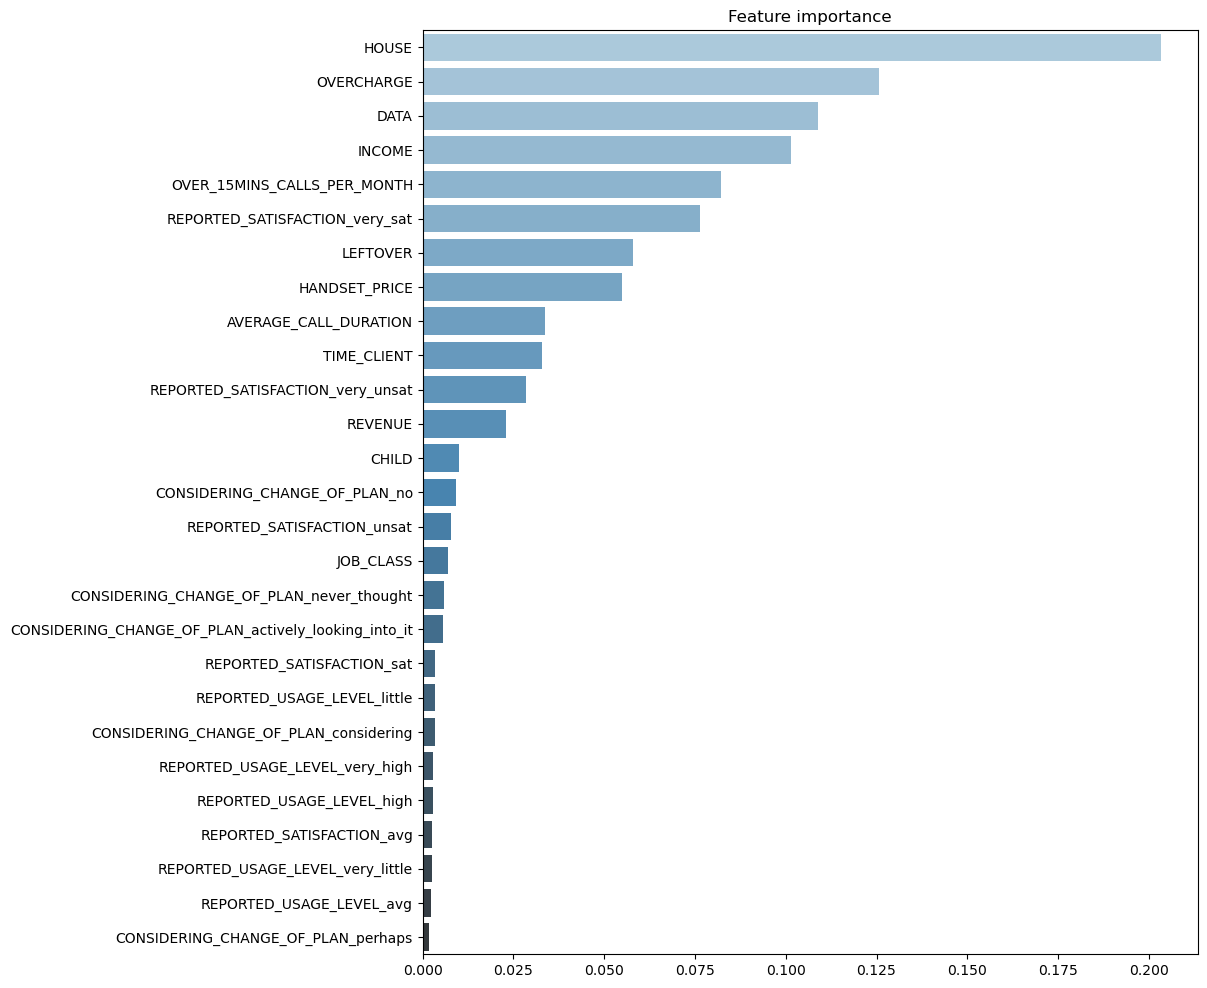

In [57]:
params = {'random_state': 0, 'n_jobs': 4, 'n_estimators': 5000, 'max_depth': 8}

# Fit RandomForest Classifier
clf = RandomForestClassifier(**params)
clf = clf.fit(x, y)
# Plot features importances
imp = pd.Series(data=clf.feature_importances_, index=x.columns).sort_values(ascending=False)
plt.figure(figsize=(10,12))
plt.title("Feature importance")
ax = sns.barplot(y=imp.index, x=imp.values, palette="Blues_d", orient='h')

We will might consider exprimenting on the 13 first features in the plot 